# Statistical Framework for Multiscale Comparative Connectomics
This notebook replicates the example graphs found in Figure 1 in _Multiscale Comparative Connectomics_.
![Fig1](figures/1_framework.jpg)

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
suppressPackageStartupMessages(library(igraph))

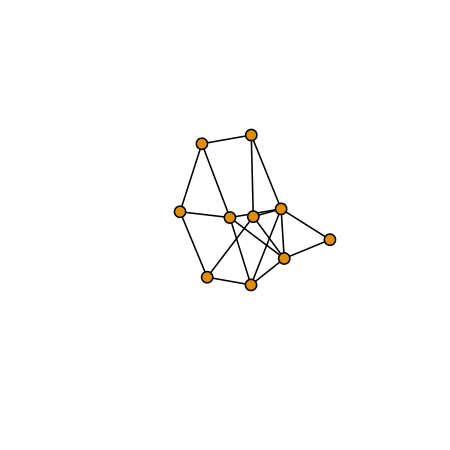

In [3]:
%%R -w 3 -h 3 --units in -r 150

g <- erdos.renyi.game(10, 0.5)
V(g)$label <- NA
ecol <- rep("black", ecount(g))
plot(g, edge.color=ecol)

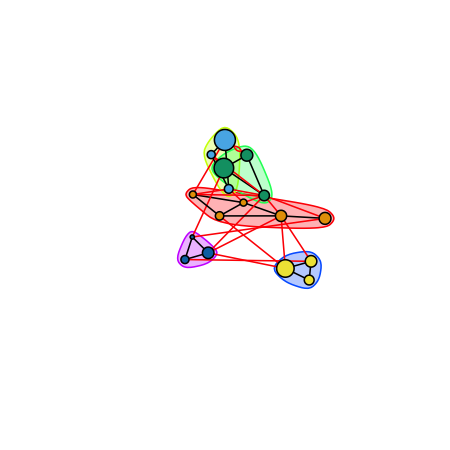

In [4]:
%%R -w 3 -h 3 --units in -r 150

# Read graph
nodes <- read.csv("../data/nodes.csv", header=T, as.is=T)
links <- read.csv("../data/edges.csv", header=T, as.is=T)
net <- graph_from_data_frame(d=links, vertices=nodes, directed=T) 

# Simplify graph
net <- simplify(net, remove.multiple = F, remove.loops = T) 
V(net)$size <- V(net)$audience.size*0.5
V(net)$label <- NA

# Plot graph
ceb <- cluster_edge_betweenness(as.undirected(net)) 
plot(ceb, as.undirected(net))